# Import Packages and Data

In [ ]:
#Import all the usual suspects

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline

np.random.seed(1)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Import Train % Test data
nba_train=pd.read_csv('NBA_Train.csv', index_col ='Train_ID' )
nba_test=pd.read_csv('NBA_Test.csv', index_col='Test_ID')

In [ ]:
# Count number of Train data
print('Train data:', len(nba_train))

# Count number of Test data
print('Test data:', len(nba_test))

Train data: 126
Test data: 127


In [ ]:
#Train data: Visualisaion of the first 5 rows 
nba_train.head()

,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,2.489530,PF,Houston Rockets,22,76,2078,19.1,0.577,9.2,18.5,14.1,7.0,1.3,3.5,8.2,18.3,119,105,4.6,2.7,7.3
2,2.433333,PG,Utah Jazz,24,73,1490,13.2,0.510,1.6,10.7,6.2,28.8,1.7,0.1,14.3,19.0,105,109,1.2,1.2,2.3
3,20.158622,SF,Oklahoma City Thunder,25,81,3122,29.8,0.635,2.2,18.6,10.8,26.7,1.7,1.5,12.2,33.0,123,104,14.8,4.4,19.2
4,12.404495,PG,Houston Rockets,26,62,2222,19.0,0.554,1.9,8.5,5.2,38.2,2.2,0.3,16.9,22.7,113,110,4.8,1.5,6.3
5,1.500000,PG,Brooklyn Nets,21,48,489,8.3,0.446,2.6,7.3,5.0,20.4,2.7,0.2,20.9,17.4,90,110,-0.4,0.3,-0.1


In [ ]:
#Test data: Visualisation of the first 5 rows
nba_test.head()

,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
Test_ID,,,,,,,,,,,,,,,,,,,,,
1,18.671659,PF,Atlanta Hawks,28,74,2482,19.8,0.545,7.2,21.9,14.6,16.2,2.6,2.5,13.2,25.7,105,102,2.7,4.0,6.7
2,5.250000,C,San Antonio Spurs,37,74,2158,21.3,0.535,8.6,28.3,18.8,16.0,1.0,4.6,13.2,25.2,106,98,2.8,4.6,7.4
3,3.376000,SF,Los Angeles Clippers,36,75,2098,16.8,0.595,1.5,18.3,9.9,14.5,2.2,1.2,15.3,22.4,109,106,2.9,2.3,5.2
4,3.425510,SG,Boston Celtics,25,81,2457,12.4,0.498,2.7,15.7,9.0,17.8,1.3,0.2,14.3,23.2,97,109,-0.5,1.8,1.4
5,10.449438,SF,Denver Nuggets,26,62,1927,12.4,0.526,3.2,13.3,8.2,9.3,1.2,1.2,8.9,19.5,107,110,1.8,1.2,3.1


# Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive statistics of Train data
nba_train.describe().round(1)

,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
count,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0
mean,6.8,26.7,69.5,1809.0,15.0,0.5,5.2,15.1,10.1,14.5,1.6,1.5,13.5,20.0,107.2,106.9,2.3,1.8,4.2
std,5.6,4.1,11.4,703.6,4.3,0.0,3.8,6.0,4.6,9.8,0.6,1.4,4.2,5.0,7.6,3.7,2.6,1.2,3.4
min,0.1,19.0,40.0,393.0,6.3,0.4,1.0,6.2,4.1,2.1,0.2,0.0,7.2,9.3,88.0,97.0,-0.9,0.0,-0.1
25%,2.4,23.0,62.0,1290.2,12.4,0.5,2.1,10.1,6.0,7.0,1.1,0.6,10.4,16.4,102.0,104.0,0.6,0.9,1.7
50%,4.5,26.0,72.5,1859.0,14.0,0.5,3.7,13.8,9.2,11.2,1.5,1.1,12.5,19.1,107.0,107.0,1.6,1.6,3.2
75%,9.6,29.0,79.0,2405.0,16.8,0.6,7.3,19.2,13.9,20.0,2.0,1.9,15.5,23.3,112.0,110.0,3.3,2.5,5.6
max,23.0,37.0,82.0,3122.0,29.8,0.7,17.5,32.1,22.3,44.3,3.8,7.4,28.8,33.0,130.0,115.0,14.8,6.4,19.2


In [ ]:
#'Normalise' SALARY using log transformation
nba_train['log_salary'] = np.log(nba_train['SALARY'])
nba_test['log_salary'] = np.log(nba_test['SALARY'])

In [ ]:
# Descriptive statistics of Train data
nba_train.describe().round(1)

,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS,log_salary
count,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0
mean,6.8,26.7,69.5,1809.0,15.0,0.5,5.2,15.1,10.1,14.5,1.6,1.5,13.5,20.0,107.2,106.9,2.3,1.8,4.2,1.5
std,5.6,4.1,11.4,703.6,4.3,0.0,3.8,6.0,4.6,9.8,0.6,1.4,4.2,5.0,7.6,3.7,2.6,1.2,3.4,0.9
min,0.1,19.0,40.0,393.0,6.3,0.4,1.0,6.2,4.1,2.1,0.2,0.0,7.2,9.3,88.0,97.0,-0.9,0.0,-0.1,-2.2
25%,2.4,23.0,62.0,1290.2,12.4,0.5,2.1,10.1,6.0,7.0,1.1,0.6,10.4,16.4,102.0,104.0,0.6,0.9,1.7,0.9
50%,4.5,26.0,72.5,1859.0,14.0,0.5,3.7,13.8,9.2,11.2,1.5,1.1,12.5,19.1,107.0,107.0,1.6,1.6,3.2,1.5
75%,9.6,29.0,79.0,2405.0,16.8,0.6,7.3,19.2,13.9,20.0,2.0,1.9,15.5,23.3,112.0,110.0,3.3,2.5,5.6,2.3
max,23.0,37.0,82.0,3122.0,29.8,0.7,17.5,32.1,22.3,44.3,3.8,7.4,28.8,33.0,130.0,115.0,14.8,6.4,19.2,3.1


From initial observation, since 'count' row of the statistics description table all return equivalent 126 datapoints for each column, equivalent with the total number of datapoints in Train data, indicating NO MISSINGE VALUES.

In [ ]:
# Pairwise correlation table
nba_train.corr().round(2)

,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS,log_salary
SALARY,1.00,0.05,0.21,0.62,0.67,0.21,-0.04,0.17,0.10,0.31,0.17,-0.04,-0.13,0.62,0.25,-0.27,0.60,0.63,0.68,0.89
Age,0.05,1.00,-0.13,-0.01,0.10,0.23,-0.08,0.05,0.01,0.09,-0.01,-0.03,0.07,0.03,0.17,-0.12,0.04,0.08,0.06,0.09
Games,0.21,-0.13,1.00,0.70,0.22,0.22,-0.04,-0.07,-0.06,0.05,-0.01,-0.10,-0.17,0.14,0.28,-0.11,0.39,0.49,0.47,0.28
Minutes,0.62,-0.01,0.70,1.00,0.54,0.24,-0.28,-0.13,-0.20,0.40,0.20,-0.23,-0.22,0.50,0.34,-0.02,0.66,0.67,0.74,0.66
PER,0.67,0.10,0.22,0.54,1.00,0.50,0.12,0.33,0.27,0.37,0.15,0.10,-0.20,0.75,0.59,-0.30,0.83,0.59,0.84,0.58
TS,0.21,0.23,0.22,0.24,0.50,1.00,0.05,0.00,0.03,-0.02,0.04,0.14,-0.03,0.03,0.86,-0.10,0.61,0.22,0.54,0.12
ORB,-0.04,-0.08,-0.04,-0.28,0.12,0.05,1.00,0.75,0.90,-0.50,-0.35,0.64,0.12,-0.17,0.09,-0.48,-0.09,0.12,-0.03,-0.08
DRB,0.17,0.05,-0.07,-0.13,0.33,0.00,0.75,1.00,0.96,-0.38,-0.33,0.60,-0.03,0.11,-0.01,-0.57,0.06,0.30,0.14,0.10
TRB,0.10,0.01,-0.06,-0.20,0.27,0.03,0.90,0.96,1.00,-0.46,-0.36,0.66,0.03,0.01,0.04,-0.58,0.01,0.25,0.09,0.03
AST,0.31,0.09,0.05,0.40,0.37,-0.02,-0.50,-0.38,-0.46,1.00,0.45,-0.45,0.35,0.42,0.10,0.14,0.36,0.21,0.35,0.31


From pairwise correlation table, there are only 6 variables that most correlated with log_salary:
- Offensive win shares (OWS) = 0.52
- Minutes played (Minutes) = 0.66
- Usage percentage (USG) = 0.56
- (DWS) = 0.58
- Personal efficiency rating (PER) = 0.58
- Win shares (WS) = 0.61

Text(0.5, 1.0, 'Correlation matrix')

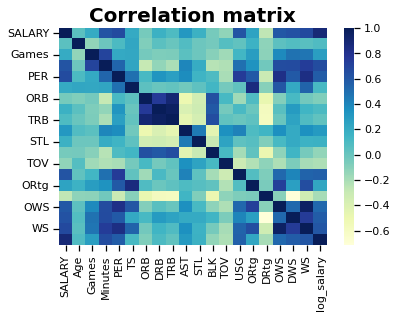

In [ ]:
# Pairwise correlation matrix

heat_map = sns.heatmap(nba_train.corr(),cmap="YlGnBu")
heat_map.set_title('Correlation matrix', fontweight='bold', fontsize=20)

From correlation matrix, we can further observe:
- Multicollinearity might be a major problem in multiple linear regression if both OWS and WS are regressors since they have perfect collinearity = 1.
- Ommited variable bias (OVB) might also be a problem in the eventual linear regression. For example, if PER is a determinant of Salary, it can cause significant bias since it has a strong, positive correlation with ORtg if ORtg is included in the model as explanatory variable while PER is not.

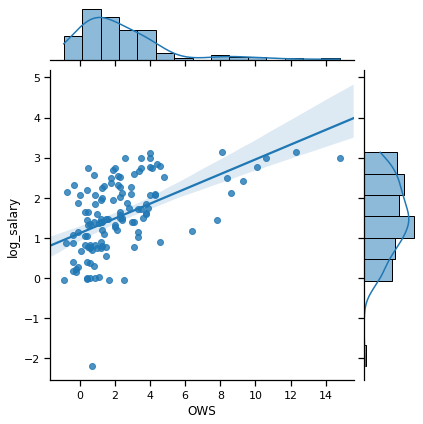

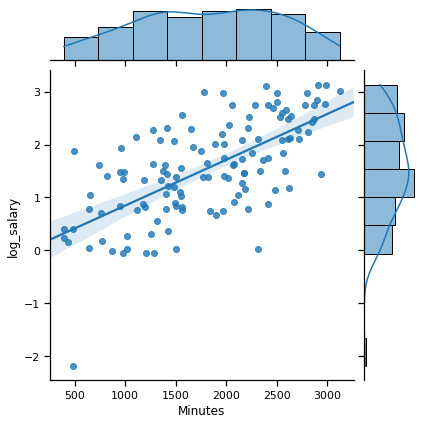

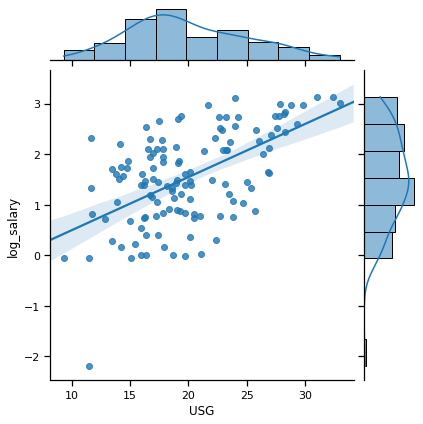

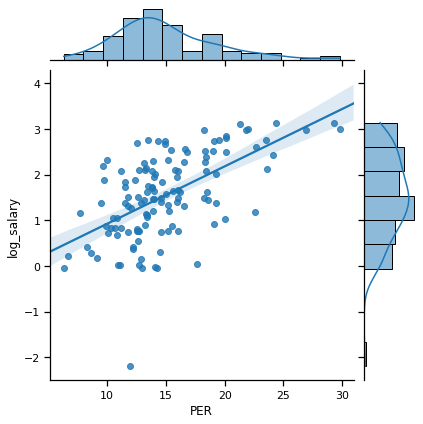

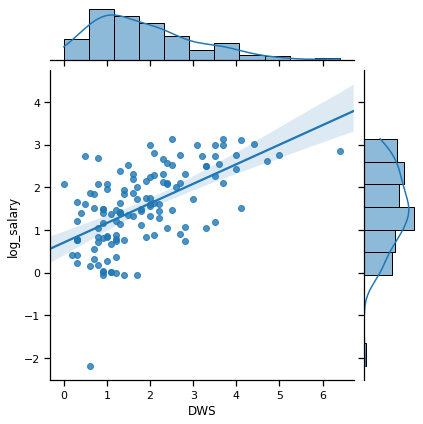

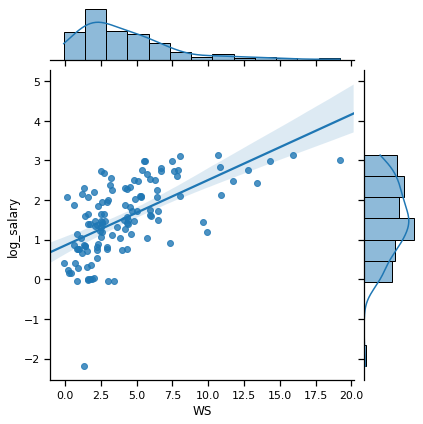

In [ ]:
# Pairwise correlation plot of the top 5 most correlated variables with log_salary

# Salary vs. OWS
sns.jointplot(x='OWS',y='log_salary', data=nba_train, kind="reg", truncate=False)

# Salary vs. Minutes
sns.jointplot(x='Minutes',y='log_salary', data=nba_train, kind="reg", truncate=False)

# Salary vs. USG
sns.jointplot(x='USG',y='log_salary', data=nba_train, kind="reg", truncate=False)

# Salary vs. PER
sns.jointplot(x='PER',y='log_salary', data=nba_train, kind="reg", truncate=False)

# Salary vs. DWS
sns.jointplot(x='DWS',y='log_salary', data=nba_train, kind="reg", truncate=False)

# Salary vs. WS
sns.jointplot(x='WS',y='log_salary', data=nba_train, kind="reg", truncate=False)

plt.show()

In [ ]:
# Coefficient of Variation (CV) of the top 6 correlated variables

print('SALARY_CV:', np.std(nba_train['SALARY'])/np.mean(nba_train['SALARY'])) #SALARY
print('log_salary_CV:', np.std(nba_train['log_salary'])/np.mean(nba_train['log_salary'])) #log_salary
print('OWS_CV:', np.std(nba_train['OWS'])/np.mean(nba_train['OWS'])) #OWS
print('Minutes_CV:',np.std(nba_train['Minutes'])/np.mean(nba_train['Minutes'])) #Minutes
print('USG_CV:',np.std(nba_train['USG'])/np.mean(nba_train['USG'])) #USG
print('PER_CV:',np.std(nba_train['PER'])/np.mean(nba_train['PER'])) #PER
print('WS_CV:',np.std(nba_train['WS'])/np.mean(nba_train['WS'])) #WS
print('DWS_CV:',np.std(nba_train['DWS'])/np.mean(nba_train['DWS'])) #DWS


SALARY_CV: 0.8292037663816889
log_salary_CV: 0.596863153348627
OWS_CV: 1.1248064706778393
Minutes_CV: 0.3873730734414159
USG_CV: 0.24724572278081997
PER_CV: 0.2866289604694852
WS_CV: 0.810321155183406
DWS_CV: 0.6381513966314165


# Module 1: MLR regression

**With Backward selection**

In [ ]:
import statsmodels.formula.api as smf

def backward_selected(data, response, nominated = []):
    """Linear model designed by backward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    if nominated:
        print("you nominated variables %s" %nominated)
    nominated = set(nominated)
    remaining^=nominated
    formula = "{} ~ {} + 1".format(response,' + '.join(remaining | nominated))
    current_score = smf.ols(formula, data).fit().rsquared_adj
    print("adj_r2 if all variables included: %f" %current_score)
    best_new_score = current_score
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(remaining^{candidate}|nominated))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("deleting %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(remaining|nominated))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model_bs1 = backward_selected(nba_train[['log_salary','Age','Games','Minutes','PER','TS','ORB','DRB','TRB','AST','STL','BLK','TOV','USG','ORtg','DRtg','OWS','DWS','WS']],'log_salary')
                                

adj_r2 if all variables included: 0.539414
deleting STL increases adj_r2 from 0.539414 to 0.543619
deleting DRB increases adj_r2 from 0.543619 to 0.547614
deleting ORB increases adj_r2 from 0.547614 to 0.551369
deleting TRB increases adj_r2 from 0.551369 to 0.554979
deleting Age increases adj_r2 from 0.554979 to 0.557282
deleting TOV increases adj_r2 from 0.557282 to 0.558803
deleting USG increases adj_r2 from 0.558803 to 0.561729
deleting ORtg increases adj_r2 from 0.561729 to 0.564586
final model is log_salary ~ AST + PER + OWS + Minutes + Games + BLK + TS + DRtg + WS + DWS + 1, with adj_r2 of 0.564586


In [ ]:
import statsmodels.formula.api as smf

formula1 = 'log_salary ~ BLK + TS + Minutes + WS + OWS + DWS + Games + AST + DRtg + PER'

model1_formula = smf.ols(formula = formula1, data = nba_train)

model_1 = model1_formula.fit()

residuals1 = model_1.resid
fitted1 = model_1.fittedvalues

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     17.21
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.04e-18
Time:                        12:31:24   Log-Likelihood:                -111.06
No. Observations:                 126   AIC:                             244.1
Df Residuals:                     115   BIC:                             275.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7122      5.721      1.523      0.131      -2.620      20.045
BLK           -0.1215      0.057     -2.122      0.036      -0.235      -0.008
TS            -2.9626      1.677     -1.767      0.080      -6.283       0.358
Minutes        0.0011      0.000      3.955      0.000       0.001       0.002
WS            -1.3564      1.087     -1.248      0.215      -3.510       0.797
OWS            1.3261      1.091      1.216      0.227      -0.834       3.487
DWS            1.2780      1.076      1.188      0.237      -0.853       3.409
Games         -0.0238      0.008     -3.079      0.003      -0.039      -0.008
AST           -0.0141      0.007     -1.885      0.062      -0.029       0.001
DRtg          -0.0609      0.051     -1.185      0.239      -0.163       0.041
PER            0.0858      0.028      3.085      0.003       0.031       0.141
==============================================================================
Omnibus:                        5.045   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.637
Skew:                          -0.462   Prob(JB):                       0.0984
Kurtosis:                       3.176   Cond. No.                     2.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


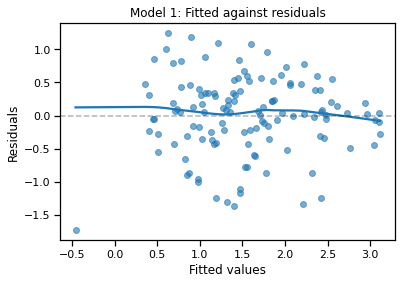

In [ ]:
fig, ax= plt.subplots()
sns.regplot(fitted1, residuals1, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Model 1: Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
#plt.show()

**Module 1 Evaluation**

In [ ]:
# Model 1 - MLR with Backward selection
predictions1 = np.exp(model_1.predict(nba_test[['BLK','TS','Minutes','WS','OWS','DWS','Games','AST','DRtg','PER']]))
mse1 = mean_squared_error(nba_test['SALARY'], predictions1)
rmse1 = np.sqrt(mse1)
print('RMSE of Model 1: $', rmse1.round(4), 'millions')

RMSE of Model 1: $ 4.0324 millions


In [ ]:
import statsmodels.api as sm

# VIF of Model 1
features1 = nba_train[['BLK','TS','Minutes','WS','OWS','DWS','Games','AST','DRtg','PER']]
features1 = sm.add_constant(features1)  

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1 = []
for i in range(10):
    vif1.append(variance_inflation_factor(features1.values, i+1))
    
vif1

[2.0244002423117355,
 1.9661708851751953,
 12.073823637132483,
 4574.755530846118,
 2770.292598083162,
 537.4669117220856,
 2.6090150844422877,
 1.8119332087617106,
 11.97139757551584,
 4.7969326088888735]

In [ ]:
# Average VIF of Model 1
sum(vif1)/10

791.9768713893593

In [ ]:
# Variance of Model 1
variance_model_1 = predictions1.var()
print(variance_model_1)

14.288611642037303


In [ ]:
# Coefficient of Variance of Model 1b output
print('Model1_CV:', np.std(predictions1)/np.mean(predictions1))

Model1_CV: 0.6639496361292879


**With Forward Selection**

In [ ]:
import statsmodels.formula.api as smf

def forward_selected(data, response, nominated = []):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [ ]:
model_fw1 = forward_selected(nba_train[['log_salary','Age','Games','Minutes','PER','TS','ORB','DRB','TRB','AST','STL','BLK','TOV','USG','ORtg','DRtg','OWS','DWS','WS']],'log_salary')
                                

adding Minutes increases adj_r2 from 0.000000 to 0.429193
adding USG increases adj_r2 from 0.429193 to 0.499337
adding Games increases adj_r2 from 0.499337 to 0.524961
adding DRtg increases adj_r2 from 0.524961 to 0.558186
adding ORB increases adj_r2 from 0.558186 to 0.561672
adding BLK increases adj_r2 from 0.561672 to 0.566963
final model is log_salary ~ Minutes + USG + Games + DRtg + ORB + BLK + 1, with adj_r2 of 0.566963


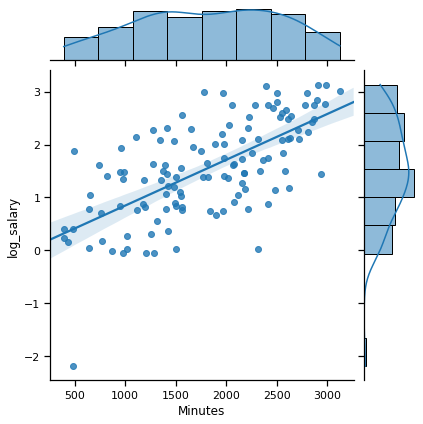

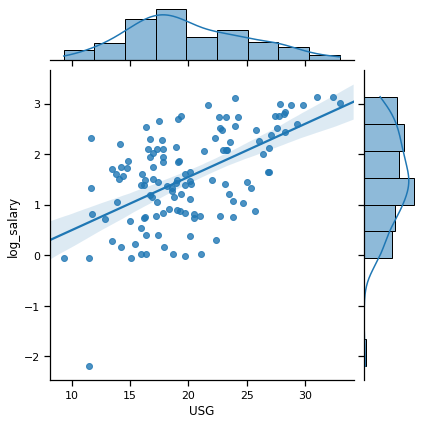

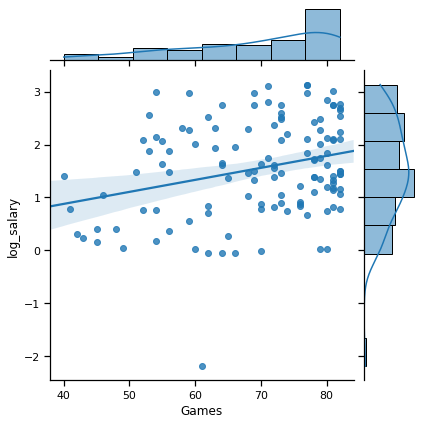

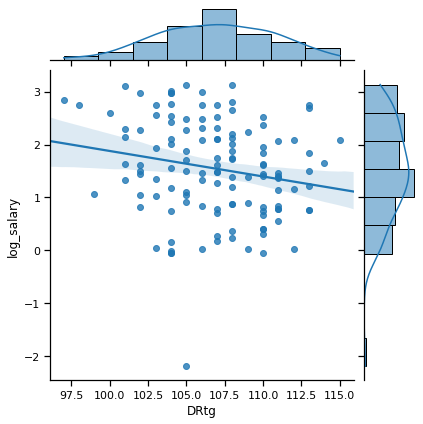

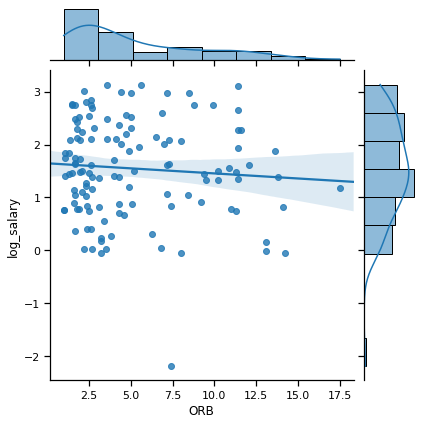

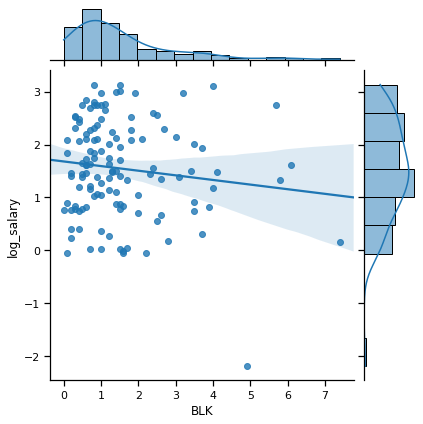

In [ ]:
#Pairwise correlation plot for each chosen independent variable

# log_salary vs. Minutes
sns.jointplot(x='Minutes',y='log_salary', data=nba_train, kind="reg", truncate=False)

# log_salary vs. USG
sns.jointplot(x='USG',y='log_salary', data=nba_train, kind="reg", truncate=False)

# log_salary vs. Games
sns.jointplot(x='Games',y='log_salary', data=nba_train, kind="reg", truncate=False)

# log_salary vs. DRtg
sns.jointplot(x='DRtg',y='log_salary', data=nba_train, kind="reg", truncate=False)

# log_salary vs. ORB
sns.jointplot(x='ORB',y='log_salary', data=nba_train, kind="reg", truncate=False)

# log_salary vs. BLK
sns.jointplot(x='BLK',y='log_salary', data=nba_train, kind="reg", truncate=False)

In [ ]:
import statsmodels.formula.api as smf

formula1b = 'log_salary ~ Minutes + USG + Games + DRtg + ORB + BLK'

model1b_formula = smf.ols(formula = formula1b, data = nba_train)

model_1b = model1b_formula.fit()

residuals1b = model_1b.resid
fitted1b = model_1b.fittedvalues

model_1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     28.28
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           8.32e-21
Time:                        12:31:31   Log-Likelihood:                -112.87
No. Observations:                 126   AIC:                             239.7
Df Residuals:                     119   BIC:                             259.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5347      2.145      2.581      0.011       1.288       9.781
Minutes        0.0011      0.000      7.667      0.000       0.001       0.001
USG            0.0374      0.014      2.739      0.007       0.010       0.064
Games         -0.0273      0.007     -3.729      0.000      -0.042      -0.013
DRtg          -0.0453      0.018     -2.483      0.014      -0.081      -0.009
ORB            0.0400      0.020      1.991      0.049       0.000       0.080
BLK           -0.0869      0.055     -1.570      0.119      -0.196       0.023
==============================================================================
Omnibus:                        8.626   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.410
Skew:                          -0.568   Prob(JB):                       0.0149
Kurtosis:                       3.557   Cond. No.                     7.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


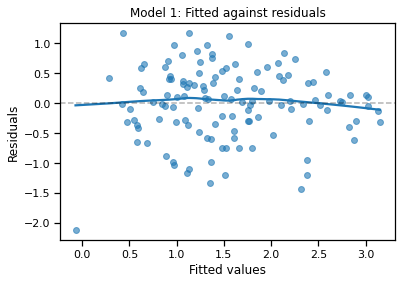

In [ ]:
fig, ax= plt.subplots()
sns.regplot(fitted1b, residuals1b, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Model 1: Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
#plt.show()

**Module 1b Evaluation**

In [ ]:
# Model 1b - MLR with Forward selection
predictions1b = np.exp(model_1b.predict(nba_test[['Minutes','USG','Games','DRtg','ORB','BLK']]))
mse1b = mean_squared_error(nba_test['SALARY'], predictions1b)
rmse1b = np.sqrt(mse1b)
print('RMSE of Model 1b: $', rmse1b.round(4), 'millions')

RMSE of Model 1b: $ 4.1572 millions


In [ ]:
import statsmodels.api as sm

# VIF of Model 1b
features1b = nba_train[['Minutes','USG','Games','DRtg','ORB','BLK']]
features1b = sm.add_constant(features1b)  

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1b = []
for i in range(6):
    vif1b.append(variance_inflation_factor(features1b.values, i+1))
    
vif1b

[3.204235182141398,
 1.5448795674020275,
 2.361834630762633,
 1.5119139376867665,
 1.9858850656423752,
 1.9010313107910113]

In [ ]:
# Average VIF of Model 1b
sum(vif1b)/6

2.0849632824043685

In [ ]:
# Variance of Model 1b output
variance_model_1b = predictions1b.var()
print(variance_model_1b)

15.369276505414032


In [ ]:
# Coefficient of Variance of Model 1b output
print('Model1b_CV:', np.std(predictions1b)/np.mean(predictions1b))

Model1b_CV: 0.693404770498629


**With 6 most correlated regressors**

In [ ]:
import statsmodels.formula.api as smf

formula1c = 'log_salary ~ OWS + Minutes + USG + PER + DWS + WS'

model1c_formula = smf.ols(formula = formula1c, data = nba_train)

model_1c = model1c_formula.fit()

residuals1c = model_1c.resid
fitted1c = model_1c.fittedvalues

model_1c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     23.77
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           2.51e-18
Time:                        12:31:32   Log-Likelihood:                -119.07
No. Observations:                 126   AIC:                             252.1
Df Residuals:                     119   BIC:                             272.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9185      0.354     -2.598      0.011      -1.619      -0.218
OWS            1.2485      1.121      1.114      0.268      -0.971       3.468
Minutes        0.0005      0.000      3.784      0.000       0.000       0.001
USG            0.0392      0.020      1.989      0.049       0.000       0.078
PER            0.0377      0.036      1.036      0.302      -0.034       0.110
DWS            1.4088      1.117      1.261      0.210      -0.803       3.621
WS            -1.2805      1.115     -1.148      0.253      -3.488       0.927
==============================================================================
Omnibus:                        9.332   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.799
Skew:                          -0.474   Prob(JB):                      0.00452
Kurtosis:                       4.076   Cond. No.                     6.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


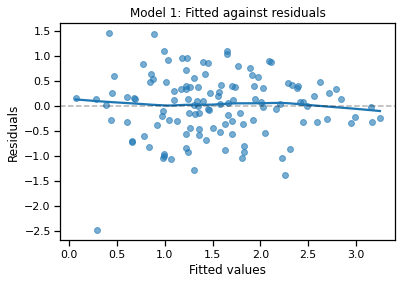

In [ ]:
fig, ax= plt.subplots()
sns.regplot(fitted1c, residuals1c, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Model 1: Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
#plt.show()

**Module 1c Evaluation**

In [ ]:
# Model 1c - MLR with 6 most correlated regressors 
predictions1c = np.exp(model_1c.predict(nba_test[['OWS','Minutes','USG','PER','DWS','WS']]))
mse1c = mean_squared_error(nba_test['SALARY'], predictions1c)
rmse1c = np.sqrt(mse1c)
print('RMSE of Model 1c: $', rmse1c.round(4), 'millions')

RMSE of Model 1c: $ 4.434 millions


In [ ]:
import statsmodels.api as sm

# VIF of Model 1c
features1c = nba_train[['OWS','Minutes','USG','PER','DWS','WS']]
features1c = sm.add_constant(features1c)  

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1c = []
for i in range(6):
    vif1c.append(variance_inflation_factor(features1c.values, i+1))
    
vif1c

[2667.298936600439,
 2.9828406630515887,
 2.9187181757265677,
 7.471357231401546,
 528.2425060199618,
 4384.201571290038]

In [ ]:
# Average VIF of Model 1c
sum(vif1c)/6

1265.5193216634364

In [ ]:
# Coefficient of Variance of Model 1c output
print('Model1c_CV:', np.std(predictions1c)/np.mean(predictions1c))

Model1c_CV: 0.6602594265289603


# Module 2: KNN regression

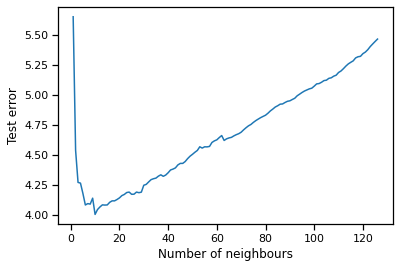

K with the lowest test error: 10


In [ ]:
# Import necessary method from a package
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Function - Determination of k that gives the lowest test error
values = np.arange(1, 127)
predictors_knn = ['BLK','Minutes','Games','PER']

losses2 = []
for k in values: 
    # 1. Specify and fit the model (there is no need to store it)
    knn2 = KNeighborsRegressor(n_neighbors=k, metric='mahalanobis', metric_params={'V': nba_train[predictors_knn].cov()}) 
    knn2.fit(nba_train[predictors_knn], nba_train['SALARY'])
    # 2. Compute predictions for the test data
    predictions2 = knn2.predict(nba_test[predictors_knn])
    # 3. Compute the root mean squared error and assign to a variable called loss
    loss2 = np.sqrt(mean_squared_error(nba_test['SALARY'], predictions2))
    
    losses2.append(loss2)

# Plot Test Error vs. Number of K
fig, ax= plt.subplots()
ax.plot(values, losses2) # add the command to plot the required rigure
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test error')
plt.show()

# Conlcusion
decision2 = 1 + np.argmin(losses2)

print('K with the lowest test error:', decision2)

In [ ]:
#9NN

# Specify the model and option
knn2 = KNeighborsRegressor(n_neighbors=9, metric='mahalanobis', metric_params={'V': nba_train[predictors_knn].cov()})

# Fit the model
model_2 = knn2.fit(nba_train[predictors_knn], nba_train['SALARY'])

print(model_2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='mahalanobis',
                    metric_params={'V':                 BLK        Minutes        Games          PER
BLK        1.848142    -224.667556    -1.505511     0.573040
Minutes -224.667556  494998.799746  5619.624635  1644.810171
Games     -1.505511    5619.624635   130.714413    10.766171
PER        0.573040    1644.810171    10.766171    18.544394},
                    n_jobs=None, n_neighbors=9, p=2, weights='uniform')


**Module 2 Evaluation**

In [ ]:
# Model 2 - 9NN with log_salary
predictions2_train = knn2.predict(nba_train[predictors_knn])
mse2_train = mean_squared_error(nba_train['SALARY'], predictions2_train)
rmse2_train = np.sqrt(mse2_train)
print('RMSE of Training Model 2: $', rmse2_train.round(4), 'millions')

predictions2 = knn2.predict(nba_test[predictors_knn])
mse2 = mean_squared_error(nba_test['SALARY'], predictions2)
rmse2 = np.sqrt(mse2)
print('RMSE of Testing Model 2: $', rmse2.round(4), 'millions')

RMSE of Training Model 2: $ 3.4553 millions
RMSE of Testing Model 2: $ 4.1408 millions


In [ ]:
# R-squared of 9NN regression
rsquared_knn = r2_score(nba_test['SALARY'], predictions2)
print(rsquared_knn)

0.42518752478606225


In [ ]:
# Coefficient of Variance of Model 2 output
print('Model2_CV:', np.std(predictions2)/np.mean(predictions2))

Model2_CV: 0.49908317301752775
